In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:
df=pd.read_csv('C:/Users/sriva/Documents/bsp/q2.csv')

In [3]:
df

,0,142.1485817
0,1,125.229054
1,2,113.076430
2,3,104.963415
3,4,100.162743
4,5,97.947182
...,...,...
20826,20827,130.129116
20827,20828,165.157860
20828,20829,167.939500
20829,20830,123.771277


In [4]:
X=df['0']
Y=df['142.1485817']


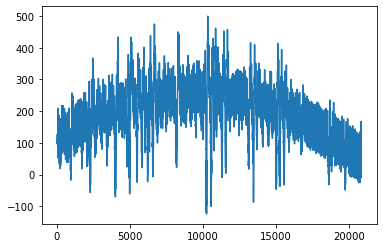

In [5]:
plt.plot(X, Y)
plt.show()

In [6]:
X=X[0:500]
Y=Y[0:500]

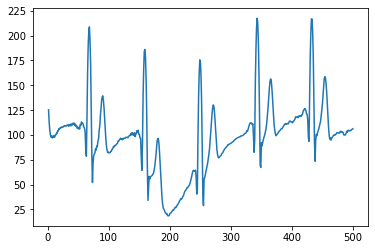

In [7]:
plt.plot(X, Y)
plt.show()

In [8]:
from scipy.fft import fft, ifft
x = np.array(Y)
y = fft(x)
y

array([ 4.91759064e+04-0.00000000e+00j,  5.35841451e+03+3.93685047e+03j,
       -2.87814803e+03-2.58751877e+03j, -5.96683956e+02+2.11188648e+03j,
        2.47334022e+02-1.69801522e+03j, -3.58653444e+03+7.91521793e+01j,
        2.01584199e+03-9.36162564e+01j,  5.71954580e+02-3.40049221e+02j,
        1.54013314e+02+8.00974513e+01j,  1.91044580e+02-7.52290822e+01j,
        9.42142431e+01+3.42058806e+01j, -3.73218484e+02-1.61994857e+01j,
        6.36709049e+01+6.48769921e+00j,  9.14108426e+01+3.85886051e+02j,
       -4.11805374e+01+3.76129010e+02j,  1.60263676e+02+2.59457461e+02j,
        1.05122222e+03+1.97172355e+03j, -8.60205632e+02-1.56107908e+03j,
       -7.67476952e+02-7.83287237e+02j, -1.91224440e+01-6.94041955e+02j,
       -3.95740828e+02+2.05696392e+02j, -8.40781778e+02-3.95182716e+02j,
        3.73073775e+03+1.53161929e+03j,  4.37405660e+02+2.08655182e+01j,
       -5.31700885e+02+4.95413413e+02j, -5.65233653e+02-6.35638560e+02j,
       -2.97324509e+02+1.31763895e+02j, -2.66341737

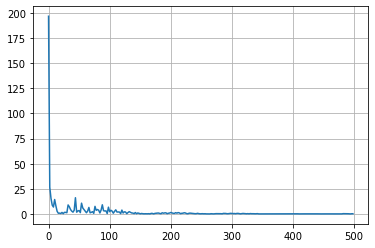

In [9]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 500
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.array(Y)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [10]:
from statistics import mean

In [11]:
y_mean=mean(Y)

In [13]:
for i in range(len(y)):
    y[i]-=y_mean

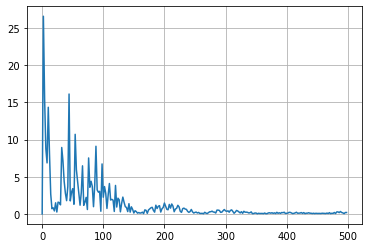

In [15]:
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

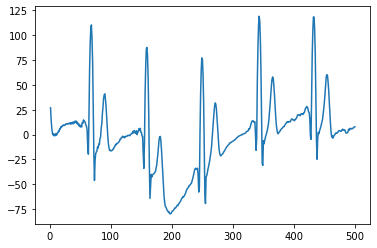

In [16]:
plt.plot(X, y)
plt.show()

# high pass filter

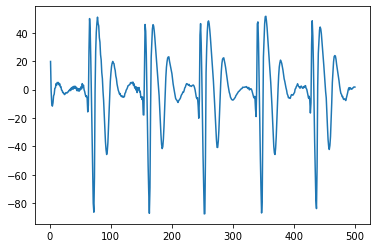

In [17]:
sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, y)
plt.plot(X, filtered)
plt.show()

# lowpass filter

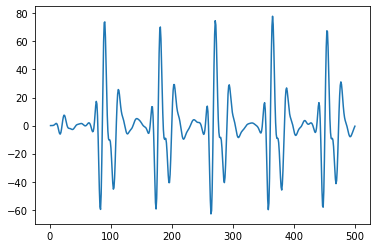

In [18]:
sos1 = signal.butter(10, 100, 'low', fs=1000, output='sos')
filtered1 = signal.sosfilt(sos1, filtered)
plt.plot(X, filtered1)
plt.show()

# notch filter

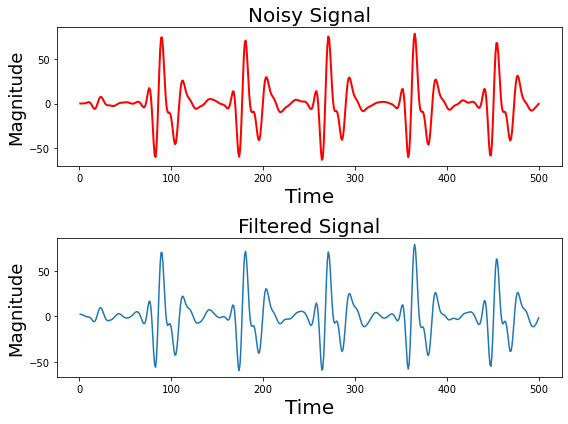

In [19]:
samp_freq = 1000  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 20.0  # Quality factor
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq) 
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
n =X 
noisySignal = filtered1 

fig = plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot(n, noisySignal, color='r', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
outputSignal = signal.filtfilt(b_notch, a_notch, noisySignal)
# Plot notch-filtered version of signal
plt.subplot(212) 
# Plot output signal of notch filter
plt.plot(n, outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()